In [1]:
import numpy as np
import torch
import torchvision
import load_model
import patch
import plot_results
import matplotlib.pyplot as plt
import calibration.distorsion

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

In [5]:
image_dim = 224
patch_relative_size = 10/100
path_dataset = 'U:\\PROJET_3A\\projet_BONTEMPS_SCHAMPHELEIRE\\Project Adverserial Patch\\Collision Avoidance\\dataset'
path_model = 'U:\\PROJET_3A\\projet_BONTEMPS_SCHAMPHELEIRE\\Project Adverserial Patch\\Collision Avoidance\\best_model_extended.pth'
path_calibration = 'U:\\PROJET_3A\\projet_NOUINOU_MOTET\calibration\\'
path_img_folder = 'U:\\PROJET_3A\\projet_NOUINOU_MOTET\\img\\'
path_patch_folder = 'U:\\PROJET_3A\\projet_NOUINOU_MOTET\\patch\\'
path_training_results = 'U:\\PROJET_3A\\projet_NOUINOU_MOTET\\training_results.txt'
path_test_results = 'U:\\PROJET_3A\\projet_NOUINOU_MOTET\\test_results.txt'
path_calibration = 'U:\\PROJET_3A\\projet_NOUINOU_MOTET\\calibration\\'
cam_mtx, dist_coef = calibration.distorsion.load_coef(path_calibration)
patch_desc = patch.PatchDesc(image_dim, patch_relative_size, cam_mtx, dist_coef)
model, train_loader, valid_loader, test_loader = load_model.load_model(path_dataset, path_model)

In [14]:
patch_desc.id = "avec distorsion 0"
patch_desc.train(3, model, train_loader, valid_loader, path_img_folder, path_training_results)

iteration 0 target proba mean 0.000000
iteration 1 target proba mean 0.000001
iteration 2 target proba mean 0.000504
iteration 3 target proba mean 0.008478
iteration 4 target proba mean 0.061011
iteration 5 target proba mean 0.007006
iteration 6 target proba mean 0.305240
iteration 7 target proba mean 0.203114
iteration 8 target proba mean 0.694812
iteration 9 target proba mean 0.887259
img 0 success rate 0.000000 val rate 0.000000
iteration 0 target proba mean 0.000001
iteration 1 target proba mean 0.000097
iteration 2 target proba mean 0.000119
iteration 3 target proba mean 0.002053
iteration 4 target proba mean 0.008356
iteration 5 target proba mean 0.017972
iteration 6 target proba mean 0.054625
iteration 7 target proba mean 0.009486
iteration 8 target proba mean 0.100228
iteration 9 target proba mean 0.145916
img 1 success rate 0.000000 val rate 0.000000
iteration 0 target proba mean 0.000000
iteration 1 target proba mean 0.013142
iteration 2 target proba mean 0.950104
img 2 succe

In [8]:
patch_desc.test(model, test_loader, path_test_results)

target proba 0.981371
img 0 success rate 1.000000
target proba 0.999949
img 1 success rate 1.000000
target proba 0.001005
img 2 success rate 0.666667
target proba 0.059120
img 3 success rate 0.500000
target proba 0.649395
img 4 success rate 0.600000
target proba 0.559459
img 5 success rate 0.666667
target proba 0.006264
img 6 success rate 0.571429
target proba 0.998673
img 7 success rate 0.625000
target proba 0.610933
img 8 success rate 0.666667
target proba 0.961611
img 9 success rate 0.700000
target proba 0.173048
img 10 success rate 0.636364
target proba 0.996737
img 11 success rate 0.666667
target proba 0.999333
img 12 success rate 0.692308
target proba 0.985281
img 13 success rate 0.714286
target proba 0.996882
img 14 success rate 0.733333
target proba 0.553869
img 15 success rate 0.750000
target proba 0.999896
img 16 success rate 0.764706
target proba 0.853303
img 17 success rate 0.777778
target proba 0.771171
img 18 success rate 0.789474
target proba 0.979394
img 19 success rate

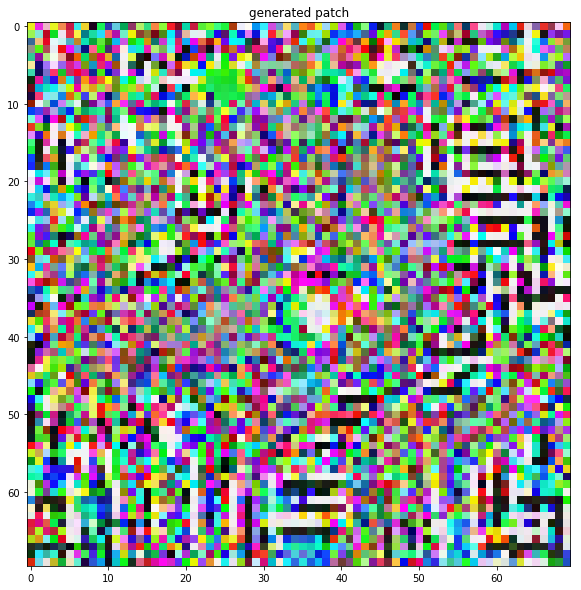

In [9]:
def tensor_to_numpy_array(tensor):
    tensor = torch.squeeze(tensor)
    array = tensor.cpu().numpy()
    return np.transpose(array, (1, 2, 0))

torchvision.utils.save_image(patch_desc.patch.data, path_patch_folder
                                            + '%s.png' 
                                            % (patch_desc.id), normalize=True)

plt.imshow(tensor_to_numpy_array(patch_desc.patch), interpolation='nearest')
plt.title('generated patch')

plt.show()


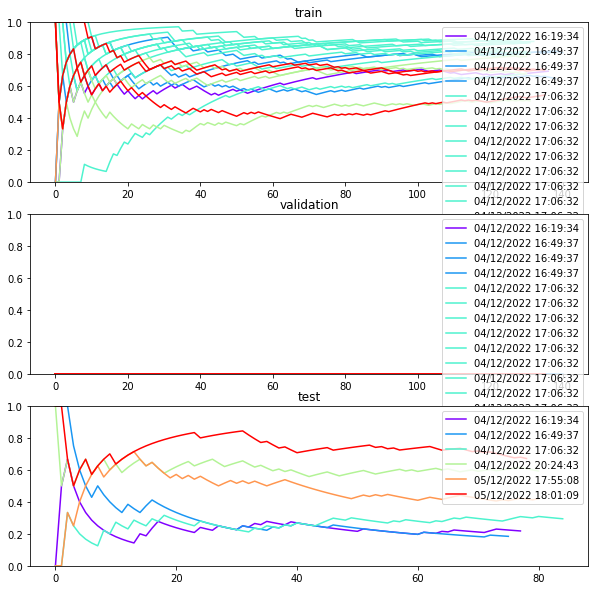

In [10]:
r_train, r_valid, training_dates = plot_results.parse_training_results(path_training_results)
r_test, _ = plot_results.parse_test_results(path_test_results)
plot_results.plot_results(r_train, r_valid, training_dates, r_test)